In [1]:
!pip install pyLDAvis -qq


In [2]:
!pip install -qq -U gensim

In [3]:
!pip install spacy -qq

In [4]:
!pip install matplotlib -qq

In [5]:
import pandas as pd
import numpy as np

import re
import string

import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\kunal\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\kunal\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [6]:
review_data= pd.read_csv("D:\\datasets\\Reviews.csv")
print(review_data.head(2))
print(len(review_data))
print('Unique Products')
print(len(review_data.groupby('ProductId')))
print('Unique Users')
print(len(review_data.groupby('UserId')))

   Id   ProductId          UserId ProfileName  HelpfulnessNumerator  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW  delmartian                     1   
1   2  B00813GRG4  A1D87F6ZCVE5NK      dll pa                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product arrived labeled as Jumbo Salted Peanut...  
568454
Unique Products
74258
Unique Users
256059


In [7]:
def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [8]:
import nltk
nltk.download('stopwords') # run this one time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kunal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [9]:
review_data.dropna(axis = 0, how ='any',inplace=True) 






review_data['Text'] = review_data['Text'].apply(clean_text)
review_data['Num_words_text'] = review_data['Text'].apply(lambda x:len(str(x).split())) 

print('-------Dataset --------')
print(review_data['Score'].value_counts())
print(len(review_data))
print('-------------------------')
max_review_data_sentence_length  = review_data['Num_words_text'].max()

mask = (review_data['Num_words_text'] < 100) & (review_data['Num_words_text'] >=20)
df_short_reviews = review_data[mask]
df_sampled = df_short_reviews.groupby('Score').apply(lambda x: x.sample(n=20000)).reset_index(drop = True)

print('No of Short reviews')
print(len(df_short_reviews))

-------Dataset --------
5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64
568411
-------------------------
No of Short reviews
373281


In [10]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# function to remove stopwords
def remove_stopwords(text):
    textArr = text.split(' ')
    rem_text = " ".join([i for i in textArr if i not in stop_words])
    return rem_text

# remove stopwords from the text
df_sampled['Text']=df_sampled['Text'].apply(remove_stopwords)

In [11]:
nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

def lemmatization(texts,allowed_postags=['NOUN', 'ADJ']): 
       output = []
       for sent in texts:
             doc = nlp(sent) 
             output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags ])
       return output

In [12]:

text_list=df_sampled['Text'].tolist()
print(text_list[1])
tokenized_reviews = lemmatization(text_list)
print(tokenized_reviews[1])

thought salt fluoride free unfortunately fluoridated avoid paying extra last years scam emerged europe rapidly spreading across worldbr involves ordinary rock salt salt range pakistan marketed luxurious healing himalaya saltbr also sold himalayan crystal salt hunzakristallsalz natural kristallsalz vitasal aromalife etcbr scam currently introduced india united statesbr result high overall fluoride intake anyone follows various therapy recommendations also noted website
['salt', 'free', 'fluoridated', 'extra', 'last', 'year', 'scam', 'worldbr', 'ordinary', 'rock', 'salt', 'luxurious', 'healing', 'himalaya', 'saltbr', 'etcbr', 'scam', 'high', 'overall', 'fluoride', 'intake', 'various', 'therapy', 'recommendation', 'website']


In [13]:
dictionary = corpora.Dictionary(tokenized_reviews)
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [14]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=500, passes=20,iterations=20)

In [15]:
lda_model.print_topics()

[(0,
  '0.048*"flavor" + 0.040*"good" + 0.030*"taste" + 0.028*"great" + 0.024*"chip" + 0.022*"snack" + 0.022*"sweet" + 0.015*"love" + 0.015*"little" + 0.014*"salt"'),
 (1,
  '0.092*"chocolate" + 0.061*"cookie" + 0.040*"candy" + 0.033*"bar" + 0.016*"soft" + 0.015*"special" + 0.015*"cake" + 0.015*"good" + 0.014*"dark" + 0.014*"pill"'),
 (2,
  '0.070*"flavor" + 0.032*"green" + 0.023*"tea" + 0.023*"breakfast" + 0.021*"delicious" + 0.021*"taste" + 0.020*"black" + 0.018*"variety" + 0.017*"good" + 0.014*"favorite"'),
 (3,
  '0.082*"food" + 0.037*"treat" + 0.026*"dog" + 0.017*"year" + 0.017*"cat" + 0.016*"good" + 0.016*"chicken" + 0.014*"time" + 0.013*"love" + 0.013*"month"'),
 (4,
  '0.059*"product" + 0.033*"time" + 0.031*"great" + 0.029*"order" + 0.023*"good" + 0.019*"price" + 0.017*"year" + 0.016*"shipping" + 0.013*"package" + 0.013*"thank"'),
 (5,
  '0.045*"size" + 0.036*"small" + 0.026*"large" + 0.026*"popcorn" + 0.023*"potato" + 0.016*"perfect" + 0.015*"fantastic" + 0.015*"awesome" + 0.0

In [16]:
# Visualize the topics
#https://github.com/bmabey/pyLDAvis
#https://speakerdeck.com/bmabey/visualizing-topic-models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)
vis

C:\Users\kunal\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.091500  0.053737       1        1  17.434417
4      0.008655 -0.182619       2        1  14.968636
3      0.003098 -0.184689       3        1  11.816791
9      0.147828  0.137823       4        1  11.262069
7      0.081831 -0.008806       5        1   9.231624
6      0.038048 -0.161309       6        1   8.940501
8      0.024624 -0.102711       7        1   7.781950
2      0.169843  0.236006       8        1   6.430320
5     -0.337086  0.048712       9        1   6.240673
1     -0.228341  0.163855      10        1   5.893021, topic_info=           Term          Freq         Total Category  logprob  loglift
291      coffee  31621.000000  31621.000000  Default  30.0000  30.0000
35         food  22201.000000  22201.000000  Default  29.0000  29.0000
105      flavor  31804.000000  31804.000000  Default  28.0000  28.0000
55        store  13083.000000  13083.000000  Default  27.0000  27.0000
99    chocolate  10736.000000  10736.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
1368        kid    815.480420   3225.857035  Topic10  -4.9621   1.4562
605       snack    949.111675   8631.868721  Topic10  -4.8104   0.6237
754      family    701.437764   4130.570936  Topic10  -5.1128   1.0584
343        hard    655.491988   2215.199053  Topic10  -5.1805   1.6137
37        great    745.386940  34407.295214  Topic10  -5.0520  -1.0007

[519 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1513      9  0.998508   addictive
1575      7  0.997010  additional
919       3  0.998409       adult
198       6  0.999253   afternoon
246       6  0.998867    allergic
...     ...       ...         ...
30        6  0.025273        year
30        7  0.098889        year
30        8  0.037320        year
30       10  0.032123        year
4973      8  0.997777      yogurt

[747 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 10, 8, 7, 9, 3, 6, 2])

In [17]:
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix,total_docs=10000))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_reviews, dictionary=dictionary , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.847629818480728

Coherence Score:  0.43853462280753996


In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [22]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=tokenized_reviews, start=2, limit=50, step=1)

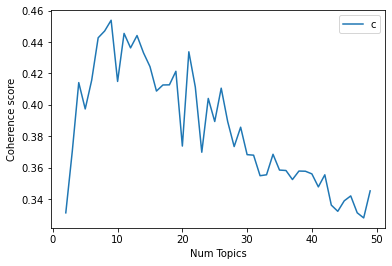

In [23]:
# Show graph
limit=50; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()# Print the coherence scores

In [24]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3312
Num Topics = 3  has Coherence Value of 0.3703
Num Topics = 4  has Coherence Value of 0.4141
Num Topics = 5  has Coherence Value of 0.3974
Num Topics = 6  has Coherence Value of 0.4157
Num Topics = 7  has Coherence Value of 0.4427
Num Topics = 8  has Coherence Value of 0.447
Num Topics = 9  has Coherence Value of 0.4538
Num Topics = 10  has Coherence Value of 0.4149
Num Topics = 11  has Coherence Value of 0.4454
Num Topics = 12  has Coherence Value of 0.4362
Num Topics = 13  has Coherence Value of 0.4441
Num Topics = 14  has Coherence Value of 0.4331
Num Topics = 15  has Coherence Value of 0.4243
Num Topics = 16  has Coherence Value of 0.4087
Num Topics = 17  has Coherence Value of 0.4126
Num Topics = 18  has Coherence Value of 0.4127
Num Topics = 19  has Coherence Value of 0.4213
Num Topics = 20  has Coherence Value of 0.3737
Num Topics = 21  has Coherence Value of 0.4337
Num Topics = 22  has Coherence Value of 0.4113
Num Topics = 23  has C

In [25]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
optimal_model.print_topics(num_words=10)

[(0,
  '0.037*"product" + 0.034*"store" + 0.034*"price" + 0.025*"good" + 0.024*"great" + 0.019*"order" + 0.018*"time" + 0.015*"local" + 0.013*"year" + 0.012*"grocery"'),
 (1,
  '0.080*"treat" + 0.050*"dog" + 0.023*"small" + 0.016*"size" + 0.016*"great" + 0.016*"product" + 0.015*"time" + 0.012*"large" + 0.012*"pill" + 0.012*"little"'),
 (2,
  '0.040*"water" + 0.029*"flavor" + 0.023*"taste" + 0.021*"drink" + 0.016*"good" + 0.016*"green" + 0.015*"product" + 0.015*"coconut" + 0.014*"tea" + 0.012*"great"'),
 (3,
  '0.033*"sugar" + 0.023*"flavor" + 0.023*"good" + 0.021*"calorie" + 0.017*"great" + 0.017*"taste" + 0.017*"fruit" + 0.017*"snack" + 0.015*"product" + 0.015*"sweet"'),
 (4,
  '0.035*"candy" + 0.019*"rice" + 0.018*"good" + 0.015*"time" + 0.014*"cake" + 0.013*"great" + 0.012*"flavor" + 0.012*"little" + 0.012*"piece" + 0.012*"kid"'),
 (5,
  '0.036*"chocolate" + 0.034*"good" + 0.031*"chip" + 0.024*"cookie" + 0.022*"flavor" + 0.020*"great" + 0.019*"sweet" + 0.018*"taste" + 0.016*"snack" 

In [28]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(optimal_model, doc_term_matrix, dictionary)
vis

C:\Users\kunal\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.098502  0.090848       1        1  19.103692
5      0.147578  0.041032       2        1  13.019117
7      0.141542 -0.132776       3        1  12.499039
8     -0.106441  0.213167       4        1  11.758500
6      0.052579 -0.029403       5        1  10.790503
2      0.072611 -0.112775       6        1  10.494175
3      0.133790  0.121737       7        1  10.200848
4     -0.049859 -0.075745       8        1   6.195674
1     -0.293299 -0.116084       9        1   5.938452, topic_info=          Term          Freq         Total Category  logprob  loglift
291     coffee  31848.000000  31848.000000  Default  30.0000  30.0000
35        food  22536.000000  22536.000000  Default  29.0000  29.0000
289      treat   9394.000000   9394.000000  Default  28.0000  28.0000
99   chocolate  10135.000000  10135.000000  Default  27.0000  27.0000
440      water   9327.000000   9327.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
57       thing    960.385326   7683.365313   Topic9  -4.8062   0.7442
65        work    790.423255   4396.536518   Topic9  -5.0010   1.1077
699       easy    790.242480   4611.010159   Topic9  -5.0012   1.0599
17        last    703.036852   4388.297333   Topic9  -5.1182   0.9924
132       good    736.423727  46385.899972   Topic9  -5.0718  -1.3192

[622 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1068      3  0.992887    acidic
1068      4  0.002634    acidic
294       3  0.006202  addicted
294       4  0.003101  addicted
294       8  0.986149  addicted
...     ...       ...       ...
30        6  0.057706      year
30        7  0.031423      year
30        8  0.108505      year
30        9  0.045744      year
4973      6  0.997689    yogurt

[1541 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 8, 9, 7, 3, 4, 5, 2])